# ARIMA and Seasonal ARIMA

####Autoregressive Integrated Moving Averages

#####The general process for ARIMA models is the following:


*   Visualize the Time Series Data
*   Make the time series data stationary
*   Plot the Correlation and AutoCorrelation Charts
*   Construct the ARIMA Model or Seasonal ARIMA based on the data
*   Use the model to make predictions



# STEP 1: Data Prep

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
from google.colab import drive
drive.mount('/content/MyDrive/')

Mounted at /content/MyDrive/


In [3]:
df=pd.read_csv('/content/content/MyDrive/perrin-freres-monthly-champagne.csv')

In [4]:
def clean_dataframe(df):
  df.columns = ["Month", "Sales"]
  df = df.dropna()
  df["Month"] = pd.to_datetime(df["Month"])
  df.set_index('Month', inplace=True)
  return df

In [5]:
df=clean_dataframe(df)

<ipython-input-4-d29195420148>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Month"] = pd.to_datetime(df["Month"])


In [6]:
# Monhtly sales of champagne
df.tail()

,Sales
Month,
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0
1972-08-01,1413.0
1972-09-01,5877.0


# Step 2: Data Visualization

<Axes: xlabel='Month'>

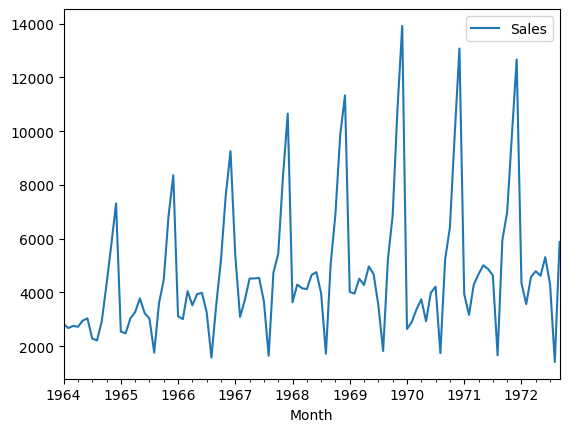

In [7]:
#Looks like a seasonality (pattern) exists.
df.plot()

In [8]:
#Testing For Stationarity
from statsmodels.tsa.stattools import adfuller


#Dickey-Fuller test
A time series is said to be 'stationary' if it has no trend, exhibits constant variance over time and has a constant autocorrelation structure over time.
One way to test whether a time series is stationary is to perform a test called 'Dickey-Fuller test' which users the following null and alternative hypotheses:

- 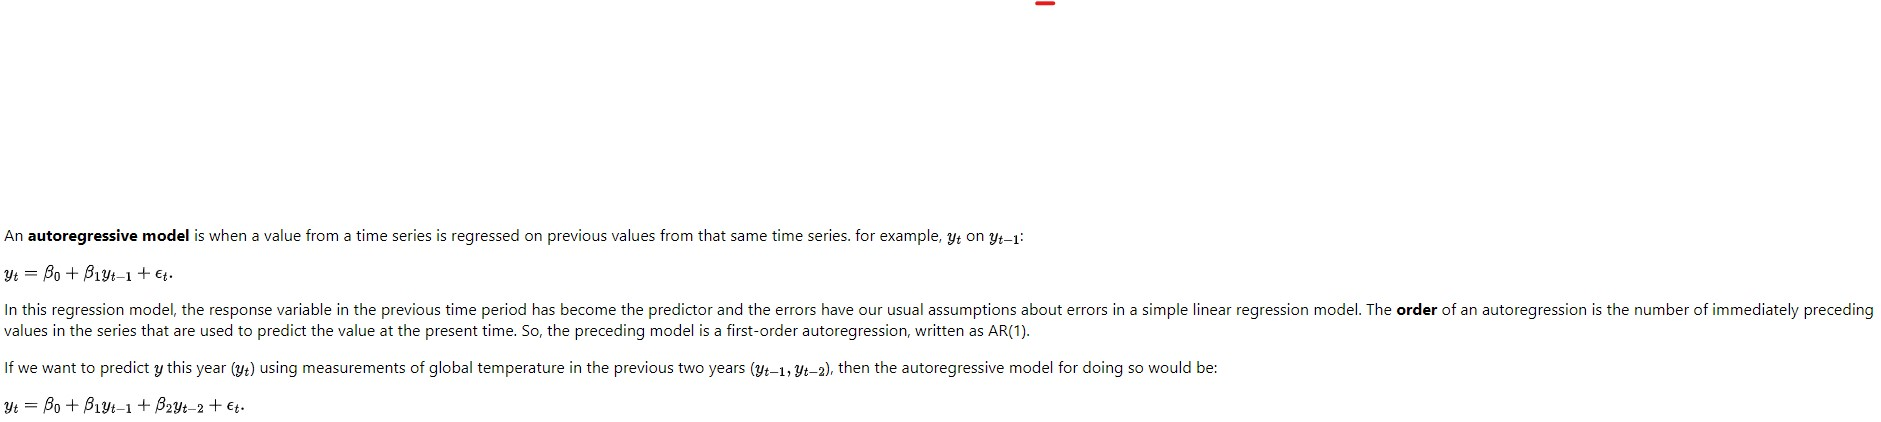If the p-value from the test is less than some significant level (0.05), then we can reject the null hypothesis and conclude that the time series is stationary.

* H0: The time series is non-stationary. In other words, it has some time-dependent structure and does not have constant variance over time.

* HA: The time series is stationary.

In [9]:
def adfuller_test(df):
  result=adfuller(df)
  labels=['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
  for value,label in zip(result,labels):
    print(label+' : '+str(value))
  if result[1] <= 0.05:
    print("Strong evidence against Ho. Reject Ho")
  else:
    print("Weak evidence against Ho. Fail to Reject Ho. It is non-stationary")


In [10]:
adfuller_test(df["Sales"])

ADF Test Statistic : -1.8335930563276215
p-value : 0.36391577166024586
#Lags Used : 11
Number of Observations Used : 93
Weak evidence against Ho. Fail to Reject Ho. It is non-stationary


In [11]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


#Differencing

One way to lower the p-value is to shift sales dataset as below.

In [12]:
df["Sales First Diff"]=df["Sales"]-df["Sales"].shift(1)

In [13]:
#shifting 12months forward
df["Seasonality Diff"]=df["Sales"]-df["Sales"].shift(12)

In [14]:
df.head(15)

,Sales,Sales First Diff,Seasonality Diff
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [15]:
adfuller_test(df["Seasonality Diff"].dropna())

ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags Used : 0
Number of Observations Used : 92
Strong evidence against Ho. Reject Ho


<Axes: xlabel='Month'>

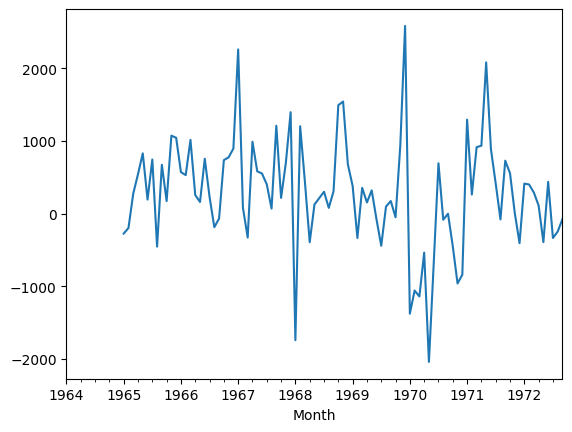

In [16]:
df['Seasonality Diff'].plot()

#Autoregressive Model

An autoregressive model is when a value from a time series is regressed on previous values from that same time series.

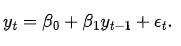



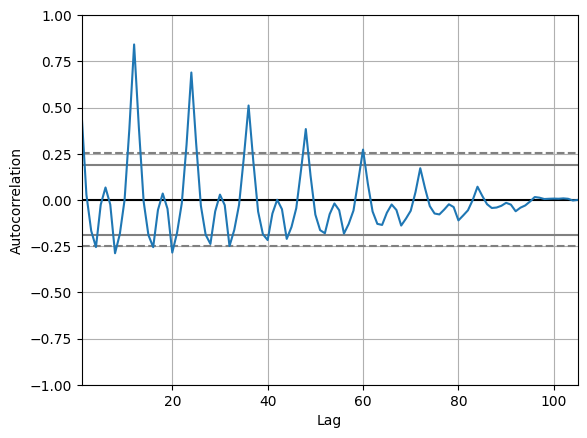

In [17]:
#For example, I want to predict sales as of today. How many previous data has to be considered? done by autocorrelation plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

#Final Thoughts on Autocorrelation and Partial Autocorrelation
Identification of an AR model is often best done with the PACF(Partial Autocorrelation Function).

For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
Identification of an MA model is often best done with the ACF rather than the PACF.

For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

ARIMA model has 3 values:
P: AR model lags

*  P: AR model lags

*  D: Differencing

*  Q: MA lags

In [24]:
df.head()

,Sales,Sales First Diff,Seasonality Diff
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN


In [22]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

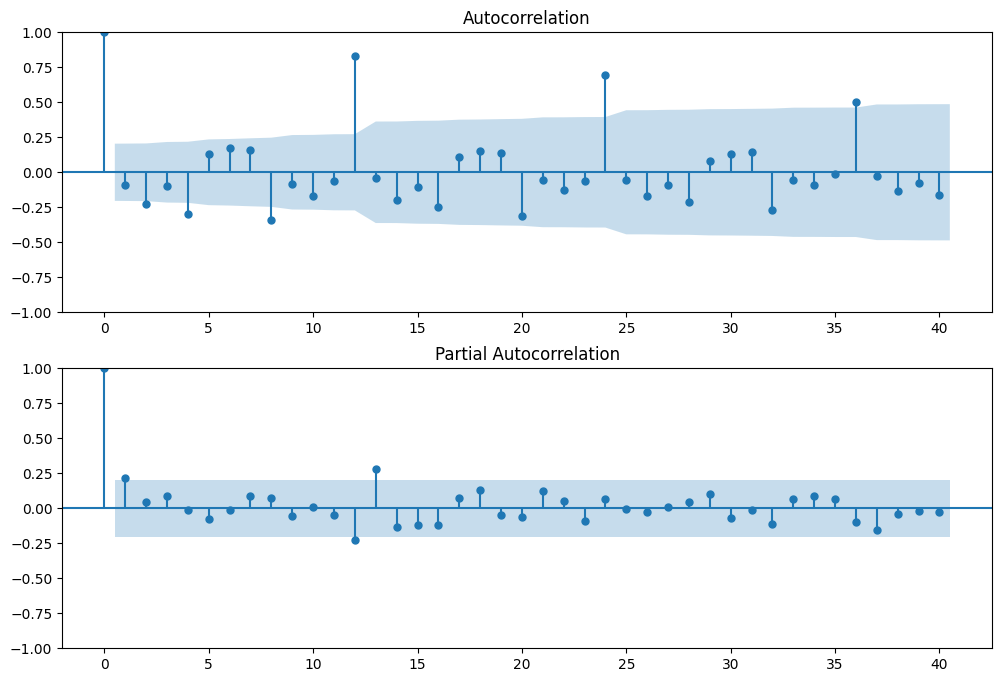

In [31]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(df["Sales First Diff"].iloc[13:],lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(df["Seasonality Diff"].dropna(),lags=40,ax=ax2)

In [39]:
# For non-seasonal data
#P=1, D=1, Q=0 or 1
from statsmodels.tsa.arima.model import ARIMA

In [40]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [41]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Fri, 15 Dec 2023   AIC                           1911.627
Time:                        18:51:03   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      4.001      0.000       0.232       0.677
ma.L1         -0.9667      0.056    -17.329      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.472      0.000    4.02e+06    6.44e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

,0
count,105.000000
mean,385.652673
std,2276.255960
min,-6658.225078
25%,-506.297027
50%,229.442849
75%,1678.826765
max,6244.573144


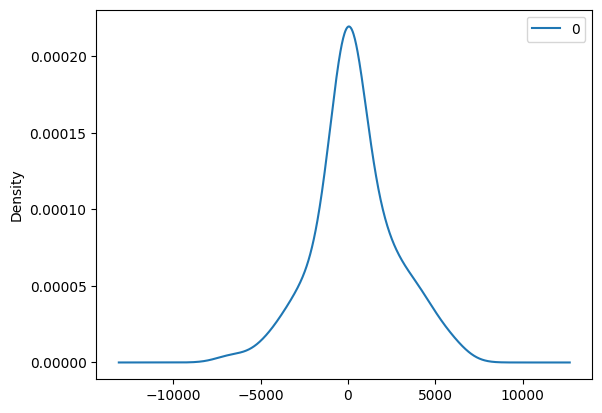

In [46]:
residuals=pd.DataFrame(model_fit.resid)
residuals.plot(kind='kde')
residuals.describe()
#the mean is not close to 0, which means the data can be biased.

<Axes: xlabel='Month'>

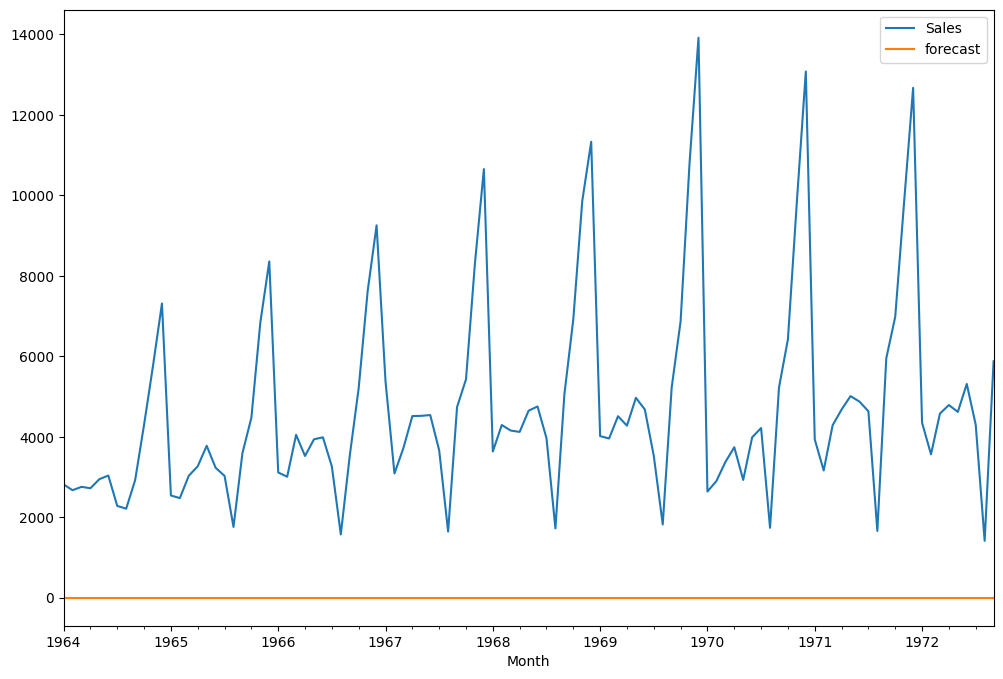

In [51]:
#As a result, the graph doesn't seem correct because there is seasonaility. Therefore, Seasonal ARIMA model fits in this case.
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[["Sales",'forecast']].plot(figsize=(12,8))

In [62]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
m_sarinax=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [63]:
m_sarinax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  105
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -738.402
Date:                            Fri, 15 Dec 2023   AIC                           1486.804
Time:                                    19:07:44   BIC                           1499.413
Sample:                                01-01-1964   HQIC                          1491.893
                                     - 09-01-1972                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2790      0.081      3.433      0.001       0.120       0.438
ma.L1         -0.9494      0.043    -22.334      0.000      -1.033      -0.866
ar.S.L12      -0.4544      0.303     -1.499      0.134      -1.049       0.140
ma.S.L12       0.2450      0.311      0.788      0.431      -0.365       0.855
sigma2      5.055e+05   6.12e+04      8.265      0.000    3.86e+05    6.25e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 8.70
Prob(Q):                              0.61   Prob(JB):                         0.01
Heteroskedasticity (H):               1.18   Skew:                            -0.21
Prob(H) (two-sided):                  0.64   Kurtosis:                         4.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
df["forecast"]=m_sarinax.predict(start=90,end=103,dynamic=True)

<Axes: xlabel='Month'>

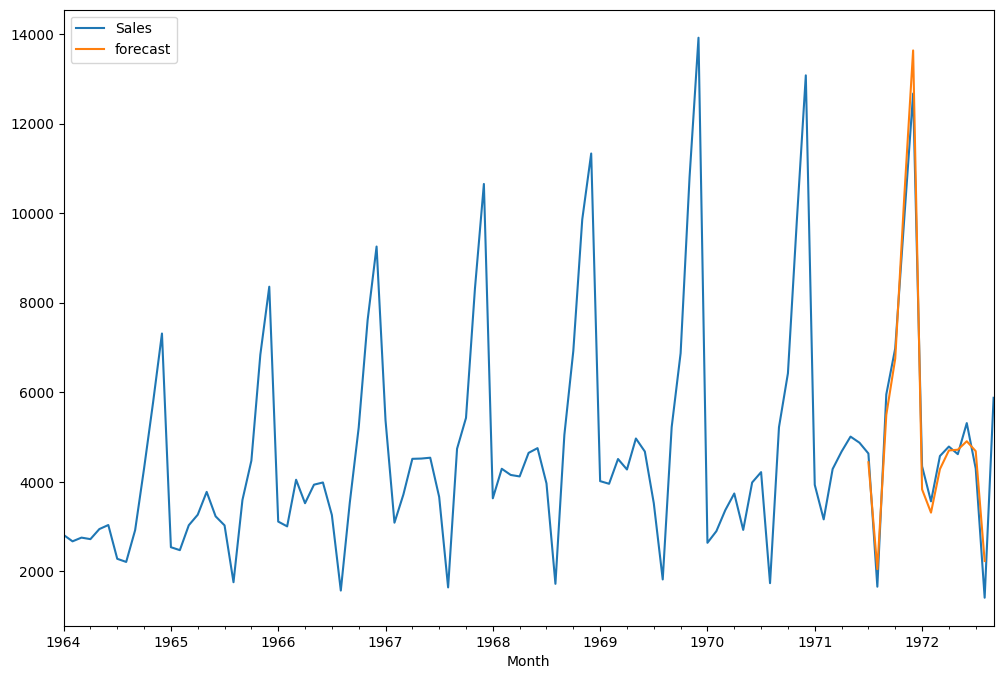

In [65]:
df[["Sales",'forecast']].plot(figsize=(12,8))

In [73]:
#Date Extension for prediction
from pandas.tseries.offsets import DateOffset
future_date=[df.index[-1]+DateOffset(months=x) for x in range(0,36)]
f_date=pd.DataFrame(index=future_date[1:], columns=df.columns)
f_df=pd.concat([df,f_date])
f_df.head()

,Sales,Sales First Diff,Seasonality Diff,forecast
1964-01-01,2815.0,NaN,NaN,NaN
1964-02-01,2672.0,-143.0,NaN,NaN
1964-03-01,2755.0,83.0,NaN,NaN
1964-04-01,2721.0,-34.0,NaN,NaN
1964-05-01,2946.0,225.0,NaN,NaN


<Axes: >

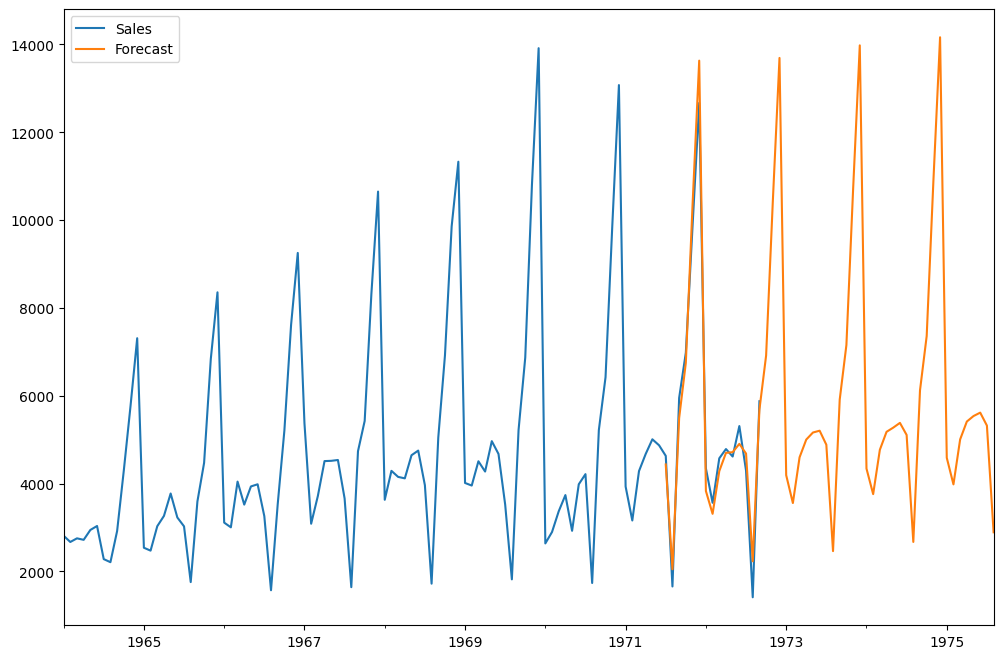

In [81]:
f_df["Forecast"]=m_sarinax.predict(start = 90, end = 150, dynamic= True)
f_df[["Sales",'Forecast']].plot(figsize=(12,8))

In [77]:
df.tail()

,Sales,Sales First Diff,Seasonality Diff,forecast
Month,,,,
1972-05-01,4618.0,-170.0,-392.0,4717.510672
1972-06-01,5312.0,694.0,438.0,4906.403885
1972-07-01,4298.0,-1014.0,-335.0,4685.436279
1972-08-01,1413.0,-2885.0,-246.0,2232.408415
1972-09-01,5877.0,4464.0,-74.0,NaN
